In [22]:
import pandas as pd
import numpy as np
%matplotlib inline

In [59]:
df= pd.read_csv("train_data.csv")
df_prediction = pd.read_csv("train_prediction.csv")
df = pd.concat([df,df_prediction['status']],axis=1)
df = pd.concat([df,pd.get_dummies(df.qualification, prefix="qualification")], axis=1) 
df = pd.concat([df,pd.get_dummies(df.property_area, prefix="prop_area")], axis=1)
df = pd.concat([df,pd.get_dummies(df.gender, prefix="gender")], axis=1)
df = pd.concat([df,pd.get_dummies(df.marital_status, prefix="married")], axis=1)
df = pd.concat([df,pd.get_dummies(df.is_self_employed, prefix="self_employed")], axis=1)
# df = pd.concat([df,pd.get_dummies(df.dependents), prefix="no_dependents"], axis=1)

del df['qualification']
del df['property_area']
del df['gender']
del df['marital_status']
del df['is_self_employed']
# del df['dependents']

df.to_csv("train_data3.csv")
# df= df.set_index(['loan_id'])

msk = np.random.rand(len(df)) < 0.8
train_data = df[msk]
test_data = df[~msk]
len(train_data), len(test_data)

(77, 23)

In [4]:
df= pd.read_csv("train_data.csv")
df_prediction = pd.read_csv("train_prediction.csv")
df = pd.concat([df,df_prediction['status']],axis=1)
print len(df), len(df.dropna())


100 80


In [3]:
train_data.head() 

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area,status
1,2,M,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,3,M,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,4,M,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,5,M,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,6,M,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [164]:
train_data.iloc[1]

loan_id                       3
gender                        M
marital_status              Yes
dependents                    0
qualification          Graduate
is_self_employed            Yes
applicant_income           3000
co_applicant_income           0
loan_amount                  66
loan_amount_term            360
credit_history                1
property_area             Urban
status                        Y
Name: 2, dtype: object

In [106]:
train_data

,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
loan_id,,,,,,,,,,,
1,M,No,0,Graduate,No,5849,0,NaN,360,1,Urban
2,M,Yes,1,Graduate,No,4583,1508,128,360,1,Rural
3,M,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban
4,M,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban
5,M,No,0,Graduate,No,6000,0,141,360,1,Urban
6,M,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban
7,M,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban
8,M,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban
9,M,Yes,2,Graduate,No,4006,1526,168,360,1,Urban


In [107]:
train_data2 = train_data.fillna(train_data.mean())

In [108]:
train_data2 = pd.concat([train_data2,pd.get_dummies(train_data2.qualification)], axis=1) 
train_data2 = pd.concat([train_data2,pd.get_dummies(train_data2.property_area)], axis=1)
del train_data2['qualification']
del train_data2['property_area']

In [80]:
# train_data2.dropna().count()

In [120]:
cols = [col for col in train_data2.columns if col not in ['marital_status','gender','is_self_employed', 'loan_id', 'dependents']]
nan_cols = train_data2.isnull().any(axis=1)
print(nan_cols[nan_cols==True].index.tolist())
train_data3 = train_data2.dropna()
train_data3[cols].head()


[12, 24, 30, 31, 96]


,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,Graduate,Not Graduate,Rural,Semiurban,Urban
loan_id,,,,,,,,,,
1,5849,0,134.855263,360,1,1,0,0,0,1
2,4583,1508,128.000000,360,1,1,0,1,0,0
3,3000,0,66.000000,360,1,1,0,0,0,1
4,2583,2358,120.000000,360,1,0,1,0,0,1
5,6000,0,141.000000,360,1,1,0,0,0,1


In [32]:
train_data2 = train_data.fillna(train_data.mean())
train_data2.to_csv("train_data2.csv")

In [140]:
# https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor
# pd.get_dummies(train_data2.qualification)

In [35]:
train_data2.gender.value_counts()

M    84
F    15
dtype: int64

In [143]:
X = train_data3[cols].as_matrix()

array([[  5.84900000e+03,   0.00000000e+00,   1.34855263e+02,
          3.60000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  4.58300000e+03,   1.50800000e+03,   1.28000000e+02,
          3.60000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  3.00000000e+03,   0.00000000e+00,   6.60000000e+01,
          3.60000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  2.58300000e+03,   2.35800000e+03,   1.20000000e+02,
          3.60000000e+02,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  6.00000000e+03,   0.00000000e+00,   1.41000000e+02,
          3.60000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00

In [ ]:
clf = neighbors.KNeighborsClassifier(10, "uniform")
clf.fit()

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


In [6]:
df= pd.read_csv("train_data.csv")
df_prediction = pd.read_csv("train_prediction.csv")
df = pd.concat([df,df_prediction['status']],axis=1)
df = pd.concat([df,pd.get_dummies(df.qualification, prefix="qualification")], axis=1) 
df = pd.concat([df,pd.get_dummies(df.property_area, prefix="prop_area")], axis=1)
df = pd.concat([df,pd.get_dummies(df.gender, prefix="gender")], axis=1)
df = pd.concat([df,pd.get_dummies(df.marital_status, prefix="married")], axis=1)
df = pd.concat([df,pd.get_dummies(df.is_self_employed, prefix="self_employed")], axis=1)
df = pd.concat([df,pd.get_dummies(df.dependents, prefix="no_dependents")], axis=1)

del df['qualification']
del df['property_area']
del df['gender']
del df['marital_status']
del df['is_self_employed']
del df['dependents']

In [9]:
df.head()

,loan_id,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,status,qualification_Graduate,qualification_Not Graduate,prop_area_Rural,...,gender_F,gender_M,married_No,married_Yes,self_employed_No,self_employed_Yes,no_dependents_0,no_dependents_1,no_dependents_2,no_dependents_3+
0,1,5849,0,NaN,360,1,Y,1,0,0,...,0,1,1,0,1,0,1,0,0,0
1,2,4583,1508,128,360,1,N,1,0,1,...,0,1,0,1,1,0,0,1,0,0
2,3,3000,0,66,360,1,Y,1,0,0,...,0,1,0,1,0,1,1,0,0,0
3,4,2583,2358,120,360,1,Y,0,1,0,...,0,1,0,1,1,0,1,0,0,0
4,5,6000,0,141,360,1,Y,1,0,0,...,0,1,1,0,1,0,1,0,0,0


qualification_Graduate        0.158966
qualification_Not Graduate    0.125320
prop_area_Rural               0.129946
prop_area_Semiurban           0.266892
prop_area_Urban               0.202335
gender_F                      0.266892
gender_M                      0.208557
married_No                    0.236647
married_Yes                   0.208557
self_employed_No              0.139207
self_employed_Yes             0.177994
dtype: float64


NameError: name 'co' is not defined

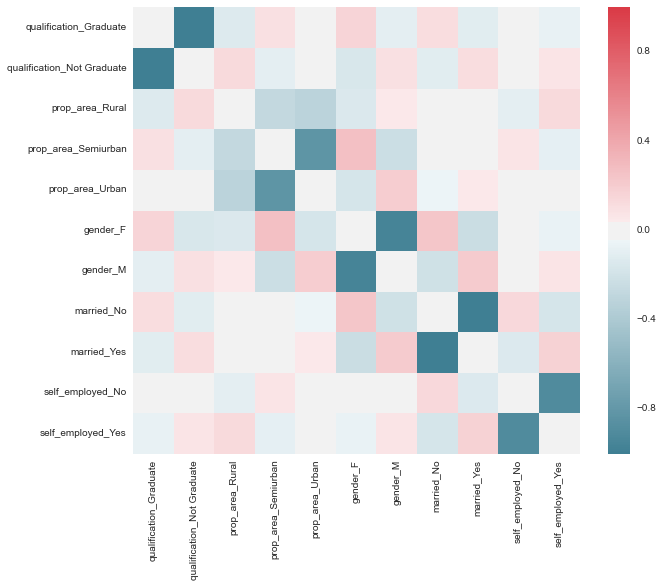

In [66]:
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
import seaborn as sns
import matplotlib.pyplot as pl
f, ax = pl.subplots(figsize=(10, 8))
corr = df.dropna().ix[:,7:].corr()

# corr[corr < .1] = 0
corr[corr == 1] = 0

print corr.max()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


print co

In [40]:
df= pd.read_csv("bccl_test_data.csv")
len(df.dropna())

392

In [41]:
len(df)

500

In [48]:
df.property_area.value_counts()

Semiurban    189
Rural        166
Urban        145
dtype: int64

In [56]:
df = pd.read_csv('train_data.csv')
df.loan_amount_term.value_counts()

360    83
180     4
120     2
300     2
240     2
480     1
60      1
dtype: int64

In [50]:
len(df), len(df.dropna())

(100, 80)

In [52]:
df = pd.read_csv('bccl_test_data.csv')


In [53]:
len(df),len(df.dropna())

(500, 392)